In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.model_selection import train_test_split

In [2]:
network_graph_data = [
  {"node": "node1", "text": "This is a positive message."},
  {"node": "node2", "text": "The product was faulty."},  # Negative sentiment
  {"node": "node3", "text": "Neutral message here."},
  {"node": "node4", "text": "I'm very happy with the purchase!"},  # Positive sentiment with emphasis
  {"node": "node5", "text": "Disappointed with the long wait time."},  # Negative sentiment with specific detail
  {"node": "node6", "text": "It met my expectations."},  # Neutral with positive connotation
  {"node": "node7", "text": "Not sure what to think about this product."},  # Neutral with uncertainty
  {"node": "node8", "text": "Great experience! Would recommend to others."},  # Positive sentiment with recommendation
  {"node": "node9", "text": "The customer service was excellent."},  # Positive sentiment for specific aspect
  {"node": "node10", "text": "A bit overpriced in my opinion."},  # Negative sentiment with justification
  {"node": "node11", "text": "Looking forward to trying it out!"},  # Positive sentiment with anticipation
  {"node": "node12", "text": "Could be better, but it works."},  # Neutral with mixed opinion
  {"node": "node13", "text": "An overall frustrating experience."},  # Negative sentiment with emphasis
  {"node": "node14", "text": "Very impressed with the quality."},  # Positive sentiment with specific detail
  {"node": "node15", "text": "Just what I needed."},  # Positive sentiment with conciseness
]

In [3]:
# Preprocessing the data
texts = [entry["text"] for entry in network_graph_data]
labels = [1 if "positive" in entry["text"] else (0 if "negative" in entry["text"] else 2) for entry in network_graph_data]

# Tokenization
max_words = 1000
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Padding sequences
max_sequence_length = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')

In [4]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

# Defining the RNN model
model = Sequential([
    Embedding(max_words, 32, input_length=max_sequence_length),
    LSTM(64),
    Dense(3, activation='softmax')  # 3 classes: positive, negative, neutral
])
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [5]:
# Converting the data to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [6]:
# Training the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluating the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 1.1083 - accuracy: 0.0833 - val_loss: 1.0962 - val_accuracy: 0.6667
Epoch 2/10
1/1 [==============================] - 0s 36ms/step - loss: 1.0924 - accuracy: 0.7500 - val_loss: 1.0903 - val_accuracy: 0.6667
Epoch 3/10
1/1 [==============================] - 0s 56ms/step - loss: 1.0768 - accuracy: 1.0000 - val_loss: 1.0844 - val_accuracy: 0.6667
Epoch 4/10
1/1 [==============================] - 0s 35ms/step - loss: 1.0611 - accuracy: 1.0000 - val_loss: 1.0783 - val_accuracy: 0.6667
Epoch 5/10
1/1 [==============================] - 0s 46ms/step - loss: 1.0448 - accuracy: 1.0000 - val_loss: 1.0720 - val_accuracy: 0.6667
Epoch 6/10
1/1 [==============================] - 0s 35ms/step - loss: 1.0278 - accuracy: 1.0000 - val_loss: 1.0653 - val_accuracy: 0.6667
Epoch 7/10
1/1 [==============================] - 0s 35ms/step - loss: 1.0095 - accuracy: 1.0000 - val_loss: 1.0581 - val_accuracy: 0.6667
Epoch 8/10
1/1 [=============

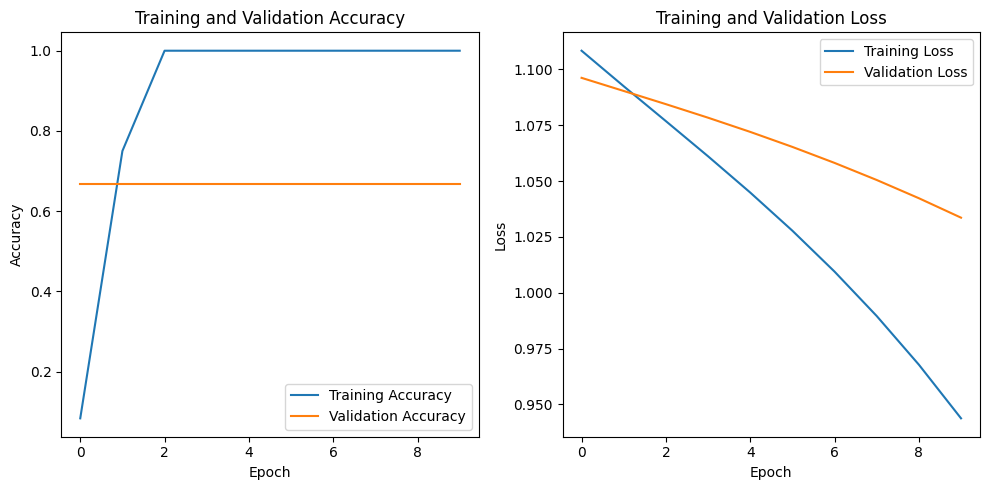

In [7]:
# Visualizing the training history
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [8]:
# Predicting sentiment on new data (network graph data)
def predict_sentiment(text):
    sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen=max_sequence_length, padding='post')
    prediction = model.predict(padded_sequence)
    sentiment_label = np.argmax(prediction)
    if sentiment_label == 0:
        return "Negative"
    elif sentiment_label == 1:
        return "Positive"
    else:
        return "Neutral"

# Example usage
new_text = "A great collaboration!"
predicted_sentiment = predict_sentiment(new_text)
print("Predicted Sentiment:", predicted_sentiment)

1/1 [==============================] - 1s 791ms/step
Predicted Sentiment: Neutral
